In [108]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt

In [94]:
def get_profile_dbqh(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    
    # get name
    try:
        name_tag = soup.find("strong", string="Họ và tên:")
        name = name_tag.next_sibling.text if name_tag else None
        # remove first space
        if name:
            name = (name[1:]
                    .replace("  ", " "))
    except:
        yield None
    # get standard name
    try:
        standard_name_tag = soup.find("strong", string="Tên thường gọi:")
        standard_name = standard_name_tag.next_sibling.text if standard_name_tag else None
        # remove first space
        if standard_name:
            standard_name = (standard_name[1:]
                            .replace("  ", " "))
    except:
        standard_name = None
    
    # get birthday
    try:
        birthday_tag = soup.find("strong", string="Ngày sinh:")
        birthday = birthday_tag.next_sibling.text if birthday_tag else None
        # remove first space
        if birthday:
            birthday =(birthday[1:]
                    .replace("\n", "")
                    .replace("\t", "")
                    .replace("\r", "")
                    .strip()
                    .replace("  ", " "))
    except:
        birthday = None

    # get gender
    try:
        gender_tag = soup.find("strong", string="Giới tính:")
        gender = gender_tag.next_sibling.text if gender_tag else None
        # remove first space
        if gender:
            gender = (gender[1:]
                    .replace("\n", "")
                    .replace("\t", "")
                    .replace("\r", "")
                    .strip()
                    .replace("  ", " "))
    except:
        gender = None

    # get birthplace
    try:
        birthplace_tag = soup.find("strong", string="Quê quán:")
        birthplace = birthplace_tag.next_sibling.text if birthplace_tag else None
        # remove first space
        if birthplace:
            birthplace = (birthplace[1:]
                        .replace("\n", "")
                        .replace("\t", "")
                        .replace("\r", "")
                        .strip()
                        .replace("  ", " ")
                        .replace("  ", ""))
    except:
        birthplace = None

    # get religion
    try:
        religion_tag = soup.find("strong", string="Tôn giáo:")
        religion = religion_tag.next_sibling.text if religion_tag else None
        # remove first space
        if religion:
            religion = (religion
                        .replace("\n", "")
                        .replace("\t", "")
                        .replace("\r", "")
                        .strip()
                        .replace("  ", " "))
    except:
        religion = None

    yield {
        "name": name,
        "standard_name": standard_name,
        "birthday": birthday,
        "birthplace": birthplace,
        "religion": religion,
        "gender": gender
    }

In [95]:
df = pd.read_csv('dbqh_links.csv')

In [96]:
def get_profile(urls):
    for url in urls:
        print(url)
        yield from get_profile_dbqh(url)

In [97]:
profiles = get_profile(df['url'])
profiles_list = []

In [98]:
for profile in profiles:
    profiles_list.append(profile)

https://dbqh.quochoi.vn/daibieu/15/4865/1/Đoan-Thi-Le-An.aspx
https://dbqh.quochoi.vn/daibieu/11/5261/1/Duong-Van-An.aspx
https://dbqh.quochoi.vn/daibieu/38/5125/1/Le-Thi-Song-An.aspx
https://dbqh.quochoi.vn/daibieu/53/2284/1/Nguyen-Van-An.aspx
https://dbqh.quochoi.vn/daibieu/47/2205/1/Tran-Thi-Hong-An.aspx
https://dbqh.quochoi.vn/daibieu/18/2238/1/Trinh-Xuan-An.aspx
https://dbqh.quochoi.vn/daibieu/23/5331/1/Pham-Đuc-An.aspx
https://dbqh.quochoi.vn/daibieu/58/2336/1/Be-Trung-Anh.aspx
https://dbqh.quochoi.vn/daibieu/20/2201/1/Le-Hoang-Anh.aspx
https://dbqh.quochoi.vn/daibieu/19/2221/1/Nguyen-Hai-Anh.aspx
https://dbqh.quochoi.vn/daibieu/7/2204/1/Nguyen-Thi-Kim-Anh.aspx
https://dbqh.quochoi.vn/daibieu/35/5213/1/Nguyen-Thi-Lan-Anh.aspx
https://dbqh.quochoi.vn/daibieu/43/2285/1/Nguyen-Thuy-Anh.aspx
https://dbqh.quochoi.vn/daibieu/23/5332/1/Nguyen-Truc-Anh.aspx
https://dbqh.quochoi.vn/daibieu/10/2188/1/Nguyen-Tuan-Anh.aspx
https://dbqh.quochoi.vn/daibieu/38/2301/1/Nguyen-Tuan-Anh.aspx
https:

In [99]:
# load list of dict to dataframe
df = pd.DataFrame(profiles_list)
df.head()

,name,standard_name,birthday,birthplace,religion,gender
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ


In [101]:
# drop na
df = df.dropna(subset=['name'])

In [102]:
# add keywork = "Đại biểu quốc hội" + name
df['keyword'] = df['name'].apply(lambda x: "Đại biểu quốc hội " + x)
df.head()

,name,standard_name,birthday,birthplace,religion,gender,keyword
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ,Đại biểu quốc hội Đoàn Thị Lê An
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam,Đại biểu quốc hội Dương Văn An
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ,Đại biểu quốc hội Lê Thị Song An
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam,Đại biểu quốc hội Nguyễn Văn An
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ,Đại biểu quốc hội Trần Thị Hồng An


In [104]:
# drop duplicate
df = df.drop_duplicates(subset=['keyword'])
df.head()

,name,standard_name,birthday,birthplace,religion,gender,keyword
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ,Đại biểu quốc hội Đoàn Thị Lê An
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam,Đại biểu quốc hội Dương Văn An
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ,Đại biểu quốc hội Lê Thị Song An
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam,Đại biểu quốc hội Nguyễn Văn An
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ,Đại biểu quốc hội Trần Thị Hồng An


In [109]:
# calculate age from birthday (dd/mm/yyyy)
def calculate_age(born):
    today = date.today()
    try:
        birthday = born.split("/")
        return today.year - int(birthday[2]) - ((today.month, today.day) < (int(birthday[1]), int(birthday[0])))
    except:
        return None

df['age'] = df['birthday'].apply(calculate_age)
df.head()

,name,standard_name,birthday,birthplace,religion,gender,keyword,age
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ,Đại biểu quốc hội Đoàn Thị Lê An,44
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam,Đại biểu quốc hội Dương Văn An,52
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ,Đại biểu quốc hội Lê Thị Song An,45
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam,Đại biểu quốc hội Nguyễn Văn An,54
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ,Đại biểu quốc hội Trần Thị Hồng An,51


In [110]:
df.shape

(495, 8)

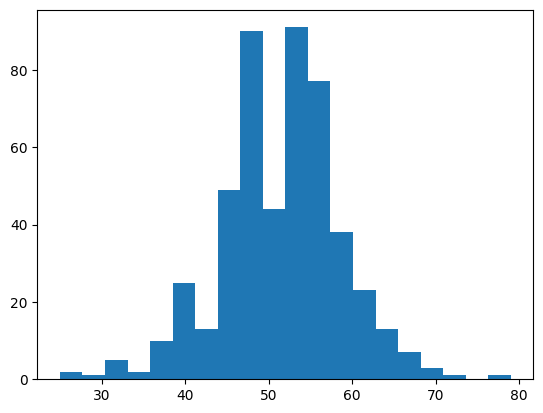

In [111]:
# plot age distribution
plt.hist(df['age'], bins=20)
plt.show()

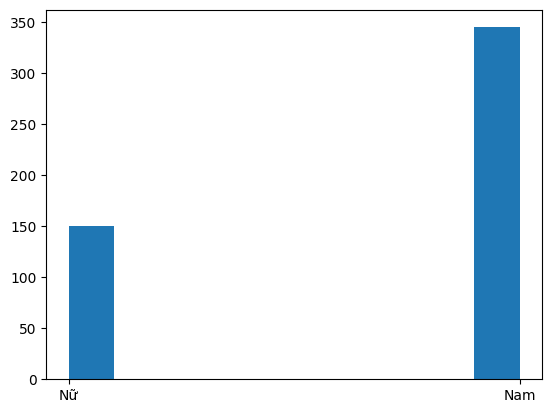

In [113]:
# plot histogram of gender
plt.hist(df['gender'])
plt.show()

In [114]:
# add column "province" from "birthplace"
df['province'] = df['birthplace'].apply(lambda x: x.split(",")[-1].strip() if x else None)
df.head()

,name,standard_name,birthday,birthplace,religion,gender,keyword,age,province
0,Đoàn Thị Lê An,Đoàn Thị Lê An,26/2/1979,"Xã Chí Thảo, huyện Quảng Hòa, Cao Bằng",Không,Nữ,Đại biểu quốc hội Đoàn Thị Lê An,44,Cao Bằng
1,Dương Văn An,Dương Văn An,15/2/1971,"Xã Phú Hồ, huyện Phú Vang, Thừa Thiên Huế",Không,Nam,Đại biểu quốc hội Dương Văn An,52,Thừa Thiên Huế
2,Lê Thị Song An,Lê Thị Song An,11/10/1977,"Thị trấn Thủ Thừa, huyện Thủ Thừa, Long An",Không,Nữ,Đại biểu quốc hội Lê Thị Song An,45,Long An
3,Nguyễn Văn An,Nguyễn Văn An,30/11/1968,"Xã An Quý, huyện Quỳnh Phụ, Thái Bình",Không,Nam,Đại biểu quốc hội Nguyễn Văn An,54,Thái Bình
4,Trần Thị Hồng An,Trần Thị Hồng An,11/12/1971,"Xã Trực Cát, huyện Trực Ninh, Nam Định",Không,Nữ,Đại biểu quốc hội Trần Thị Hồng An,51,Nam Định


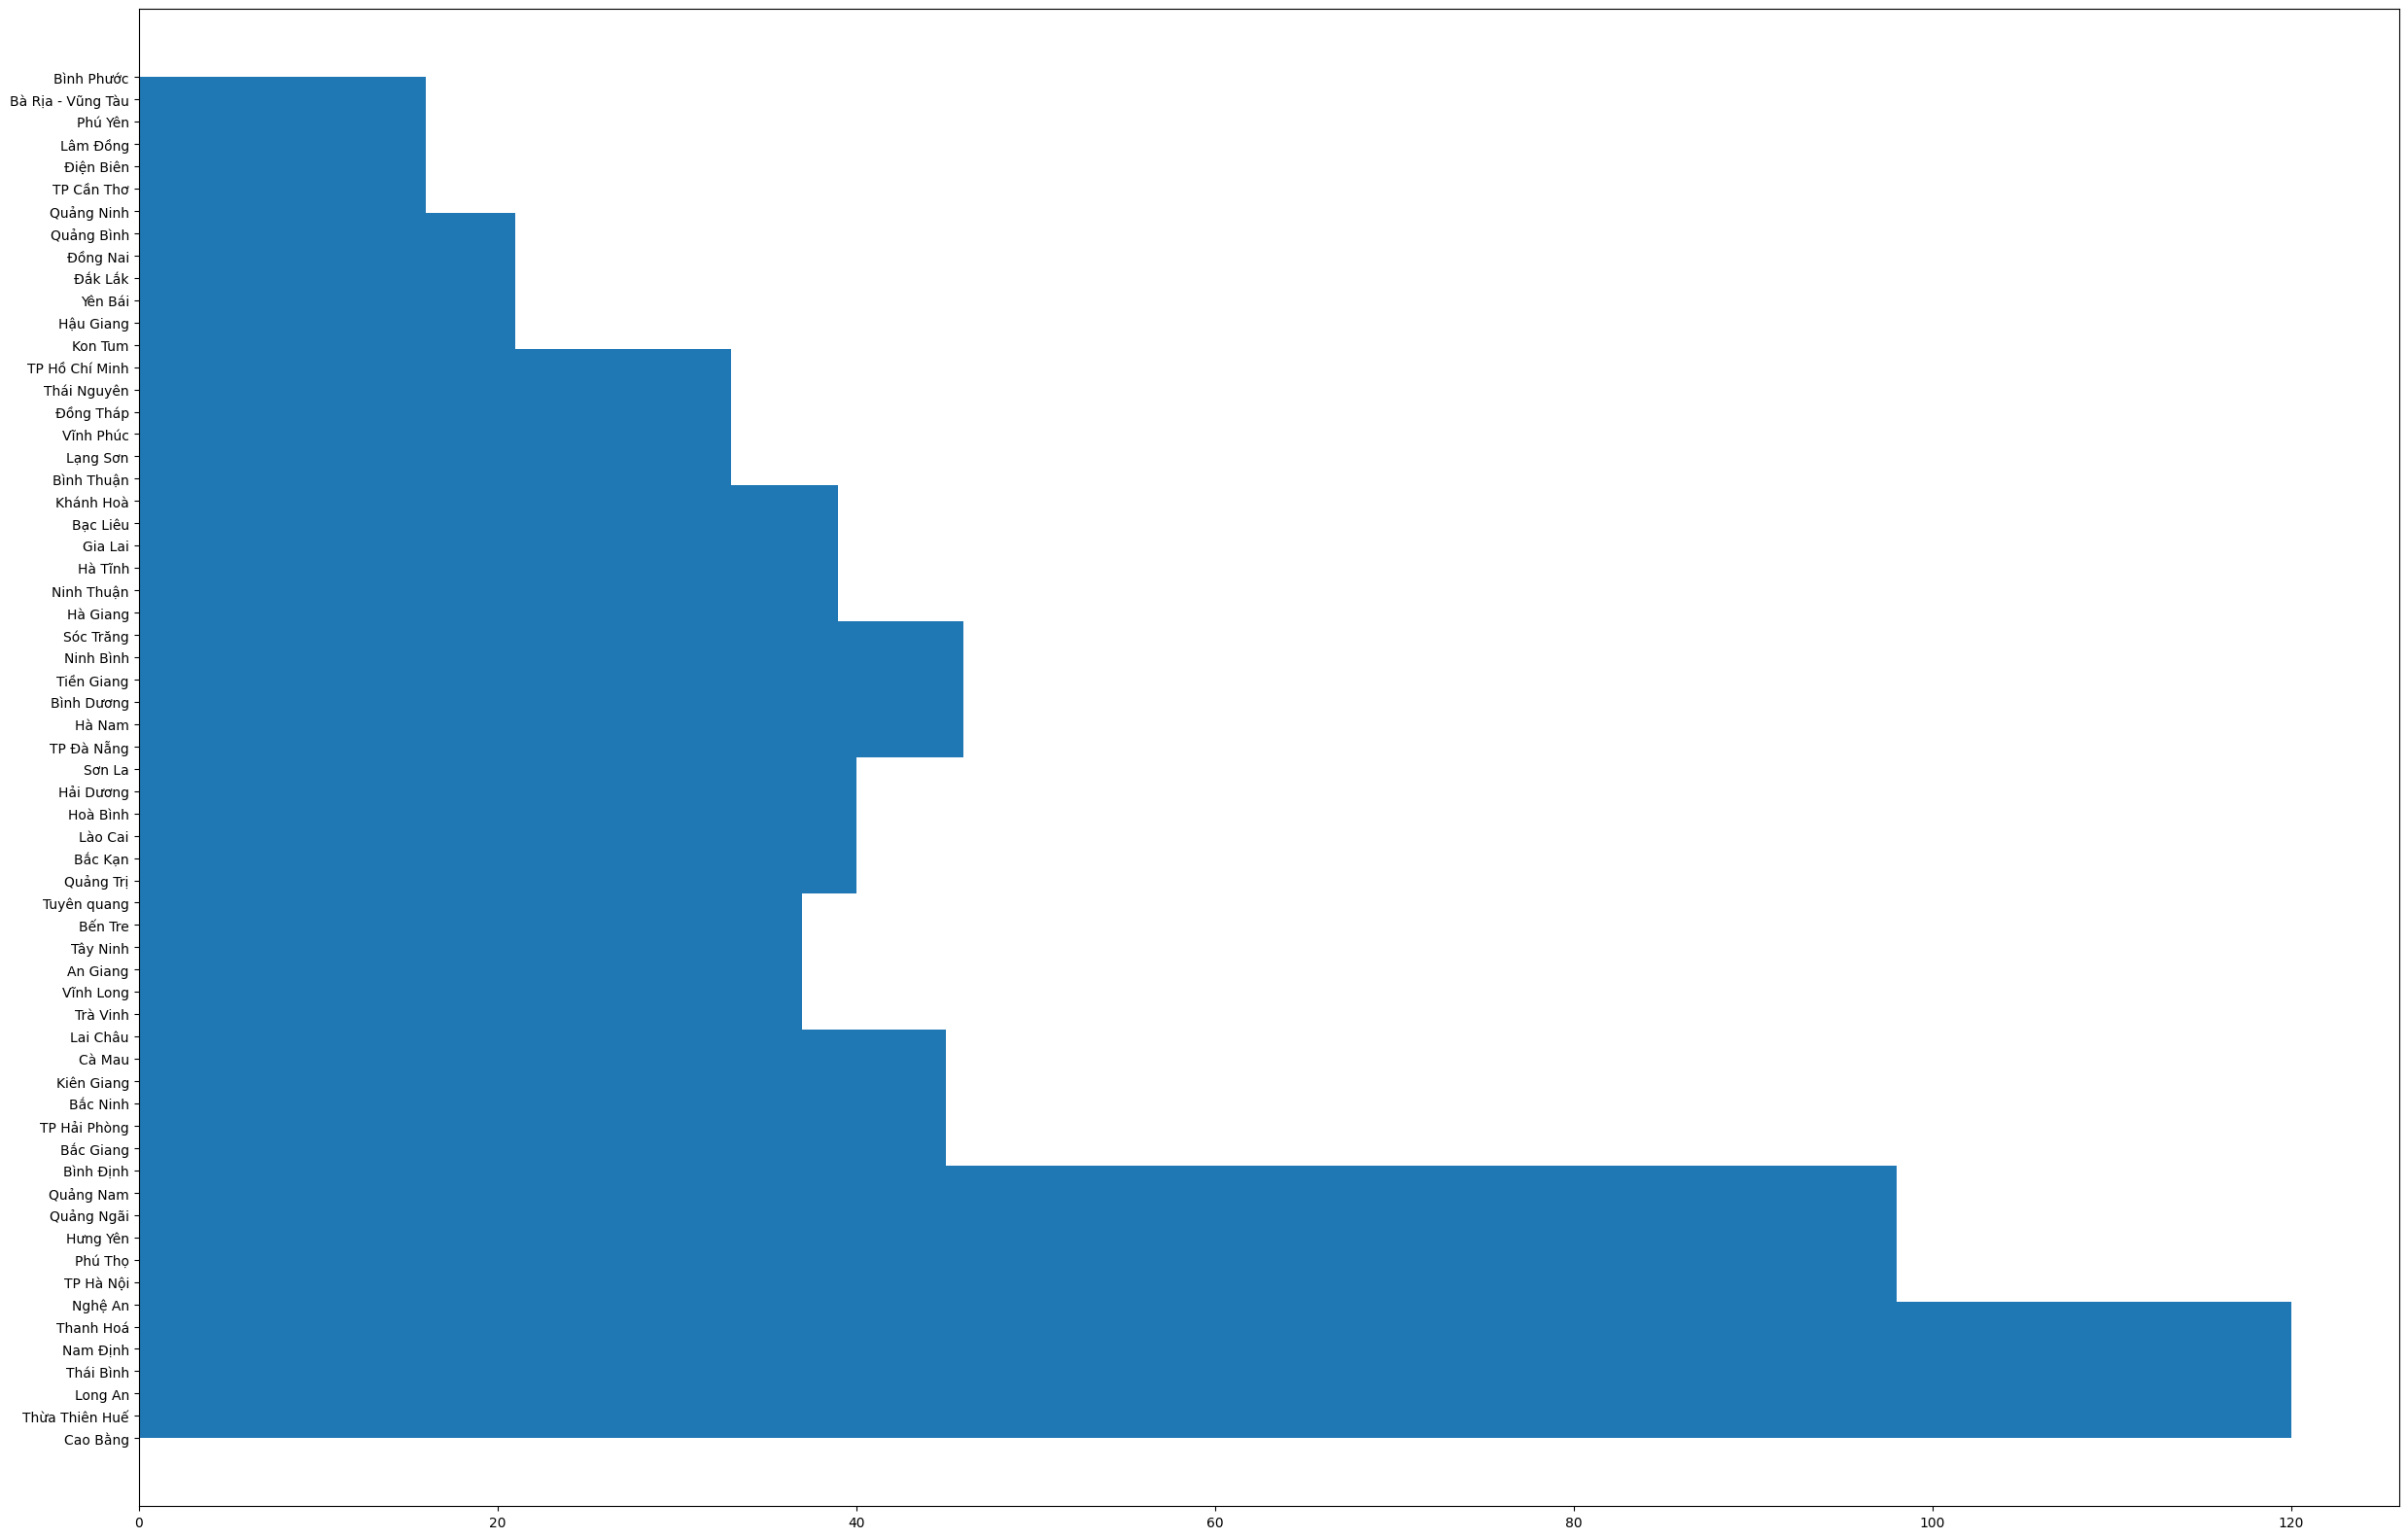

In [120]:
# plot histogram of province (horizontal axis is number of dbqh)
plt.figure(figsize=(30, 20))
plt.hist(df['province'], orientation='horizontal')
plt.show()

In [106]:
df.to_csv('dbqh.csv', index=False)